In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline as plt
from sklearn.preprocessing import MinMaxScaler	
from sklearn.preprocessing  import KBinsDiscretizer,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


In [2]:
df=df = pd.read_csv(r"C:\Users\Hp\Downloads\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
scale=MinMaxScaler()
#normalization
x=df['blood_glucose_level'].values.reshape(-1,1)
 
x=LabelEncoder()
df['gender']=x.fit_transform(df['gender'])
df['smoking_history']=x.fit_transform(df['smoking_history'])




In [4]:
#reduction
x=PCA(n_components=4)
df_new=x.fit_transform(df)
df_new

array([[  5.25688498, -37.39167517,  -6.10037509,  -1.30747825],
       [-56.75830032, -17.14850407,  -0.84880268,   2.32929992],
       [ 18.64492906,  15.49977676,   1.35868071,  -2.0168368 ],
       ...,
       [ 19.00551025, -22.43548879,  -2.16470768,  -0.40435155],
       [-39.33484365,  13.43981093,  10.31994099,  -1.82459605],
       [-46.62000881, -18.73624901,  -6.07810769,   1.20695307]])

,k,wss,wss2,bss,bss2,iterations,iterations2
0,2,1.428624e+07,1.429604e+07,-1.428624e+07,-1.429604e+07,5,6
1,3,6.702704e+06,6.712480e+06,-6.702704e+06,-6.712480e+06,10,4
2,4,3.720428e+06,3.723302e+06,-3.720428e+06,-3.723302e+06,4,5
3,5,2.308197e+06,2.316609e+06,-2.308197e+06,-2.316609e+06,6,4
4,6,1.575642e+06,1.592494e+06,-1.575642e+06,-1.592494e+06,4,4
5,7,1.146336e+06,1.156314e+06,-1.146336e+06,-1.156314e+06,4,5
6,8,8.885389e+05,8.919131e+05,-8.885389e+05,-8.919131e+05,4,6
7,9,7.023566e+05,7.023195e+05,-7.023566e+05,-7.023195e+05,5,6


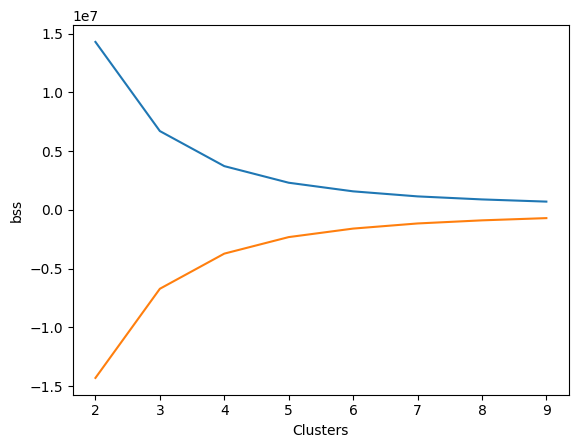

In [5]:


wss_values1=[]
wss_values2=[]
bss_values1=[]
bss_values2=[]
df_new = pd.DataFrame(df_new)

df1 = df.iloc[:, :2]
df2 = df.iloc[2:, :4]
df1=np.array(df1)
df2=np.array(df2)

df1 = pd.DataFrame(df1)
df2= pd.DataFrame(df2)
k_values=[]
iteration_values1=[]
iteration_values2=[]

for k in range(2,10):
    kmeans1=KMeans(n_clusters=k,max_iter=100)
    kmeans1.fit(df1)
    wss_values1.append(kmeans1.inertia_)
    kmeans2=KMeans(n_clusters=k,max_iter=100)
    kmeans2.fit(df2)
    wss_values2.append(kmeans2.inertia_)
    bss_values1.append(kmeans1.score(df1))
    bss_values2.append(kmeans2.score(df2))
    k_values.append(k)
    


    n_iterations1 = kmeans1.n_iter_
    n_iterations2 = kmeans2.n_iter_
    iteration_values1.append(n_iterations1)
    iteration_values2.append(n_iterations2)


results_df = pd.DataFrame({'k': k_values, 'wss': wss_values1,'wss2': wss_values2, 'bss': bss_values1, 'bss2': bss_values2, 'iterations': iteration_values1,'iterations2': iteration_values2})

x=plt.plot(range(2,10),wss_values1)
plt.xlabel('Clusters')
plt.ylabel('Error')

y=plt.plot(range(2,10),bss_values2)
plt.xlabel('Clusters')
plt.ylabel('bss')

results_df


As at 9 clusters the Error is Minimum hence K=9 is most appropriate 

In [12]:
#KNN
knn=KNeighborsClassifier()

x=df[['gender','age','hypertension'	,'heart_disease','smoking_history',	'bmi','HbA1c_level','blood_glucose_level']]
y=df[['diabetes']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cr=classification_report(y_test,y_predict)
 
print(cm)
print(cr)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[18148   126]
 [  806   920]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18274
           1       0.88      0.53      0.66      1726

    accuracy                           0.95     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000



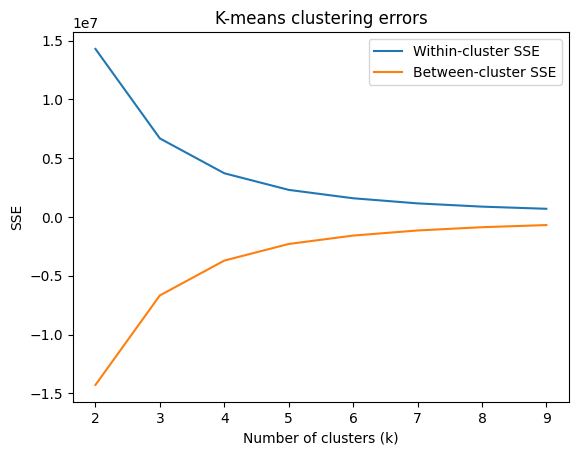

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


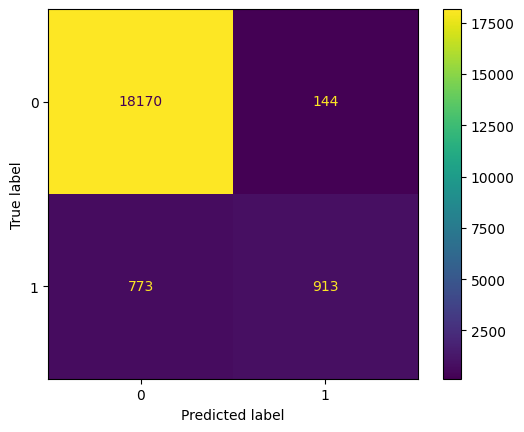

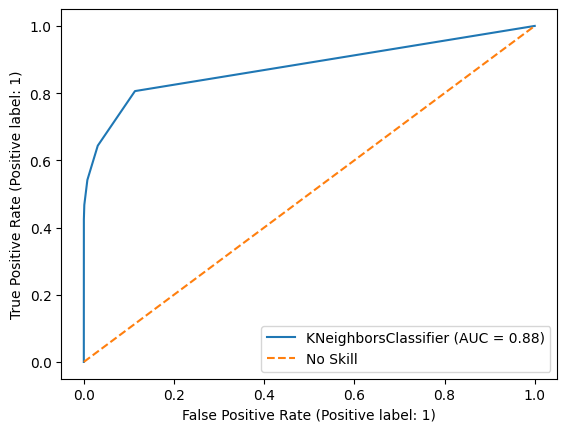

In [137]:
plt.plot(results_df['k'], results_df['wss'], label='Within-cluster SSE')
plt.plot(results_df['k'], results_df['bss'], label='Between-cluster SSE')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('K-means clustering errors')
plt.legend()
plt.show()




plot_confusion_matrix(knn, x_test, y_test)
 
# ROC curve plot
plot_roc_curve(knn, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.legend()
plt.show()